<h2 align=center>Tumor Diagnosis (Part 1): Exploratory Data Analysis</h2>
<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">


### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Task 1: Loading Libraries and Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time

The standard deviation (SD) measures the amount of variability, or dispersion, for a subject set of data from the mean, while the standard error of the mean (SEM) measures how far the sample mean of the data is likely to be from the true population mean. The SEM is always smaller than the SD.

In [2]:
data=pd.read_csv("data.csv")

<h2 align=center> Exploratory Data Analysis </h2>

---

### Task 2: Separate Target from Features
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [3]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [4]:
y=data.diagnosis
drop_cols=['Unnamed: 32','id','diagnosis']
X=data.drop(drop_cols,axis=1)

In [5]:
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


### Task 3: Plot Diagnosis Distributions
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

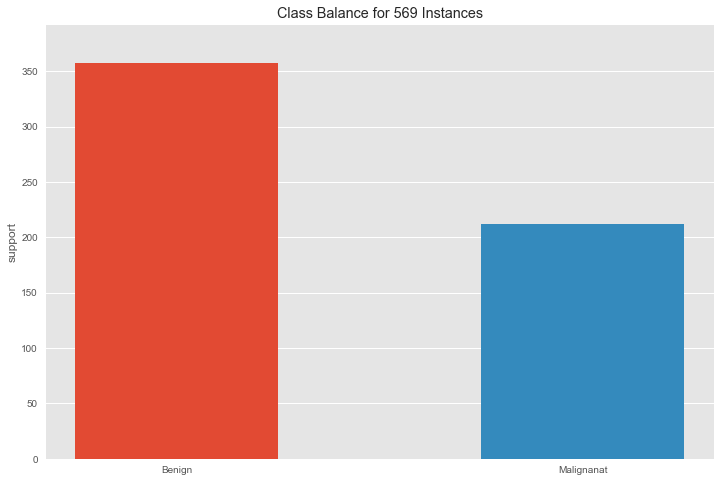

Number Of Benign Tumors  357
Number of Malignanat Tumors 212


In [6]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)
visualizer = ClassBalance (labels=['Benign','Malignanat']).fit(y)
visualizer.show()
B,M=y.value_counts()
print("Number Of Benign Tumors ",B)
print("Number of Malignanat Tumors",M)

Number Of Benign Tumors  357
Number of Malignanat Tumors 212


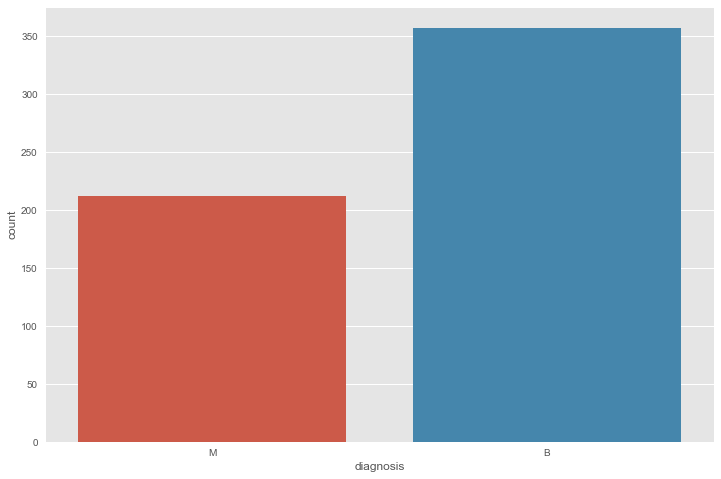

In [7]:
ax=sns.countplot(y,label='Count')
B,M=y.value_counts()
print("Number Of Benign Tumors ",B)
print("Number of Malignanat Tumors",M)

<h2 align=center> Data Visualization </h2>

---

### Task 4: Visualizing Standardized Data with Seaborn
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

It is a technique to estimate the unknown probability distribution of a random variable, based on a sample of points taken from that distribution. We are estimating the probability density function of the variable, and we use kernels to do this, hence the name.

### Data Normalization scaling 0-1
""" Normalization Helps in specifying ranges so that when bulding models a specific variable will not have more influence on the Models Normalization Three Methods:

1
column=column/coulmn(Max)
2
column=column-column(min) /column(max)-column(min)
3
column = column-column(mean) /column(standard_Deviation)¶
"""! 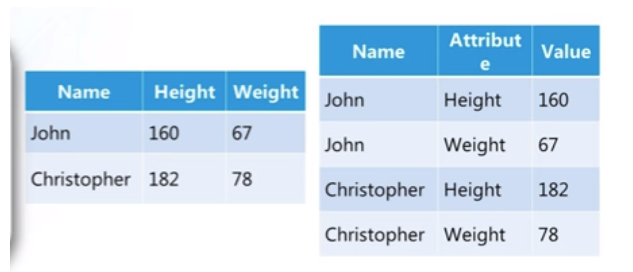

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

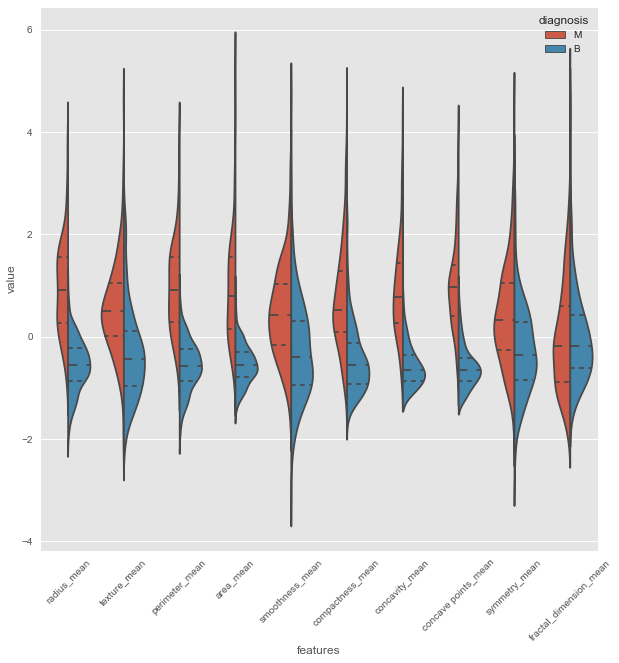

In [68]:
data = X
#normalization of the data
data_std=(data-data.mean())/data.std()
#data_std all rows but first 10 columns
data=pd.concat([y,data_std.iloc[:,0:10]],axis=1)
#Pivot: Turn rows into columns.
#Unpivot: Turn columns into rows.
data=pd.melt(data,id_vars='diagnosis',
             var_name='features',
             value_name='value'
            )
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quartile')
plt.xticks(rotation=45)

pandas.melt(frame, id_vars=None, value_vars=None,
 var_name=None, value_name='value', col_level=None)
Parameters:

frame : DataFrame
id_vars[tuple, list, or ndarray, optional] : Column(s) to use as identifier variables.-------------------------------------
value_vars[tuple, list, or ndarray, optional]: Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.-------------------------------------------------------
var_name[scalar]: Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.-----------------
value_name[scalar, default ‘value’]: Name to use for the ‘value’ column.------------------------------------------------
col_level[int or string, optional]: If columns are a MultiIndex then use this level to melt.-----------------------------------

### Task 5: Violin Plots and Box Plots
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

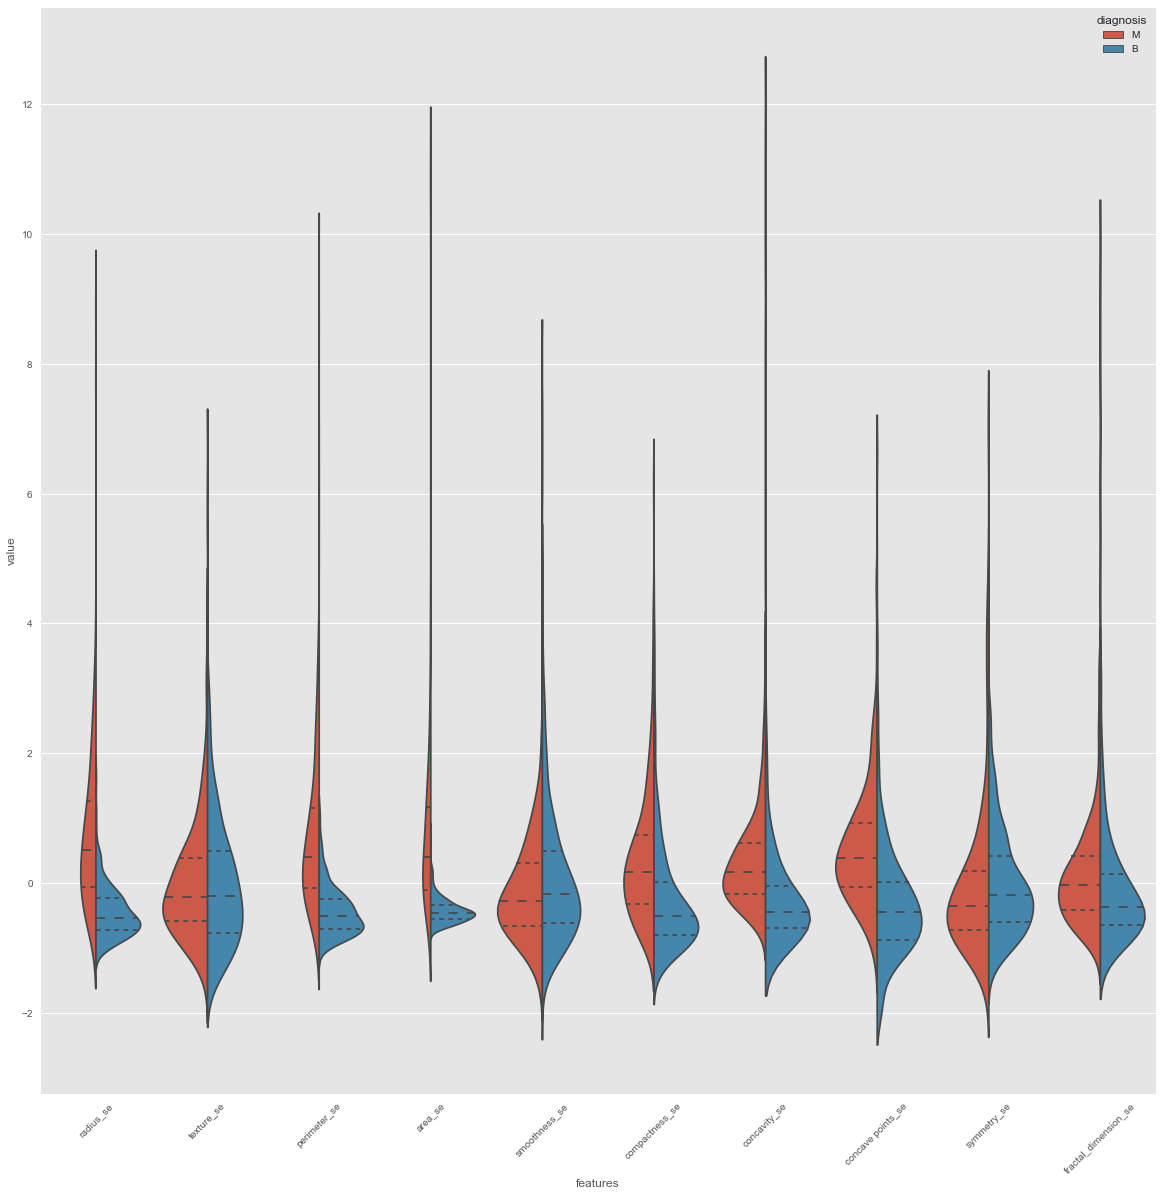

In [69]:
#data_std all rows but first 10 columns
data=pd.concat([y,data_std.iloc[:,10:20]],axis=1)
#Pivot: Turn rows into columns.
#Unpivot: Turn columns into rows.
data=pd.melt(data,id_vars='diagnosis',
             var_name='features',
             value_name='value'
            )
plt.figure(figsize=(20,20))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quartile')
plt.xticks(rotation=45);

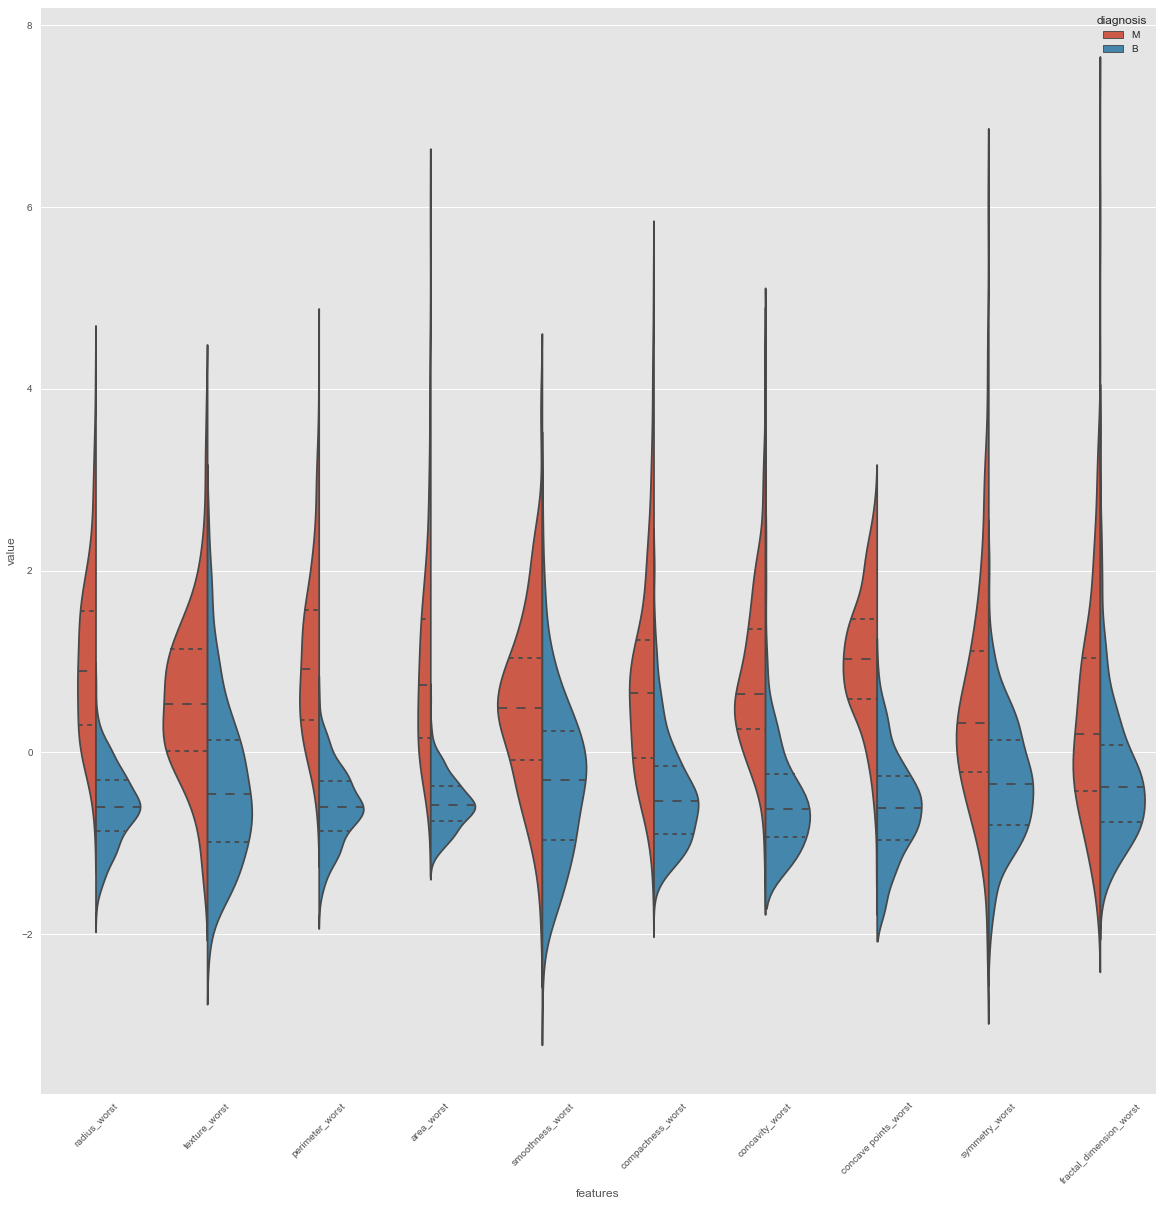

In [70]:
#data_std all rows but first 10 columns
data=pd.concat([y,data_std.iloc[:,20:30]],axis=1)
#Pivot: Turn rows into columns.
#Unpivot: Turn columns into rows.
data=pd.melt(data,id_vars='diagnosis',
             var_name='features',
             value_name='value'
            )
plt.figure(figsize=(20,20))
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quartile')
plt.xticks(rotation=45);

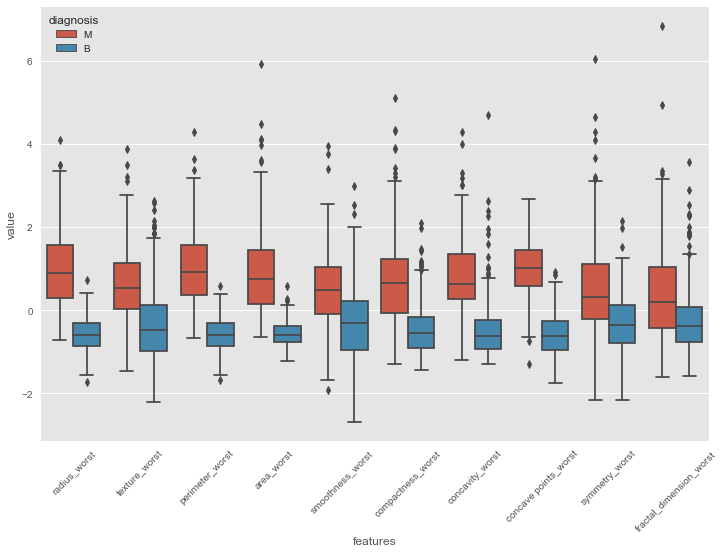

In [71]:
sns.boxplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45);

### Task 6: Using Joint Plots for Feature Comparison
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

## Finding the degree of correlation (Highly Corelated)

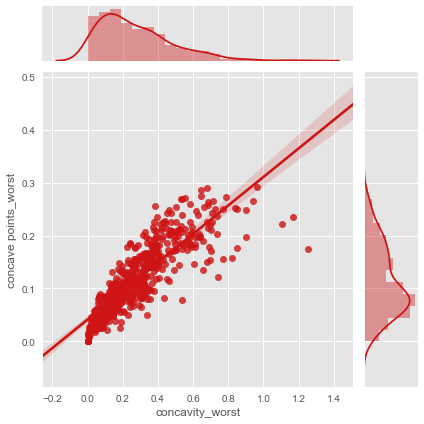

In [72]:
sns.jointplot(X.loc[:,'concavity_worst'],
              X.loc[:,'concave points_worst'],
              kind='regg',
              color='#ce1414'
             );

### Task 7: Observing the Distribution of Values and their Variance with Swarm Plots
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

### Displaying each point along with representation.

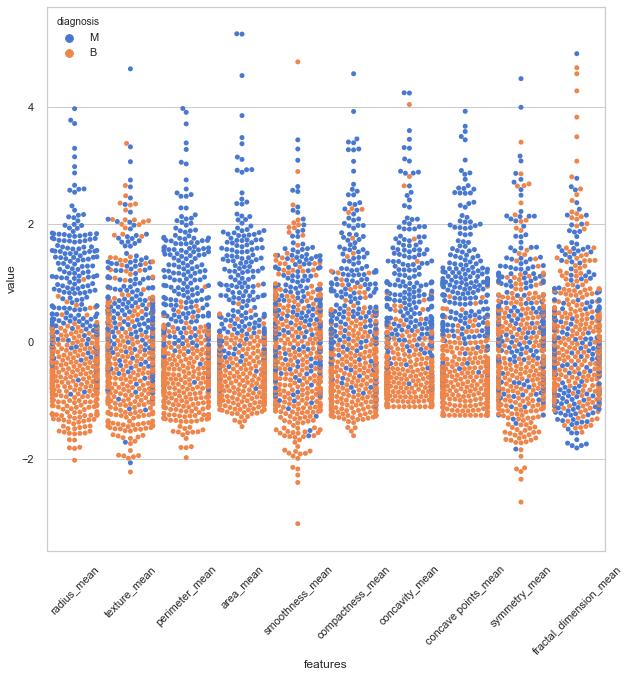

In [74]:
sns.set(style='whitegrid',palette='muted')
data = X
#normalization of the data
data_std=(data-data.mean())/data.std()
#data_std all rows but first 10 columns
data=pd.concat([y,data_std.iloc[:,0:10]],axis=1)
#Pivot: Turn rows into columns.
#Unpivot: Turn columns into rows.
data=pd.melt(data,id_vars='diagnosis',
             var_name='features',
             value_name='value'
            )
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45);

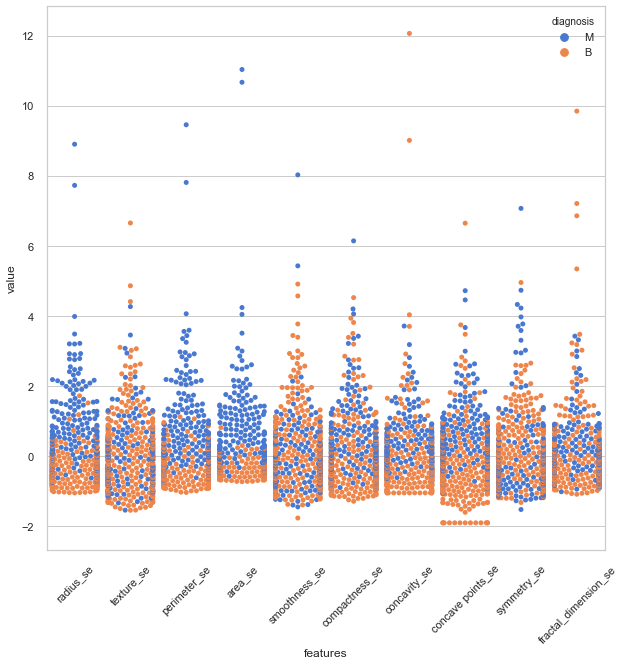

In [75]:
sns.set(style='whitegrid',palette='muted')
data = X
#normalization of the data
data_std=(data-data.mean())/data.std()
#data_std all rows but first 10 columns
data=pd.concat([y,data_std.iloc[:,10:20]],axis=1)
#Pivot: Turn rows into columns.
#Unpivot: Turn columns into rows.
data=pd.melt(data,id_vars='diagnosis',
             var_name='features',
             value_name='value'
            )
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45);

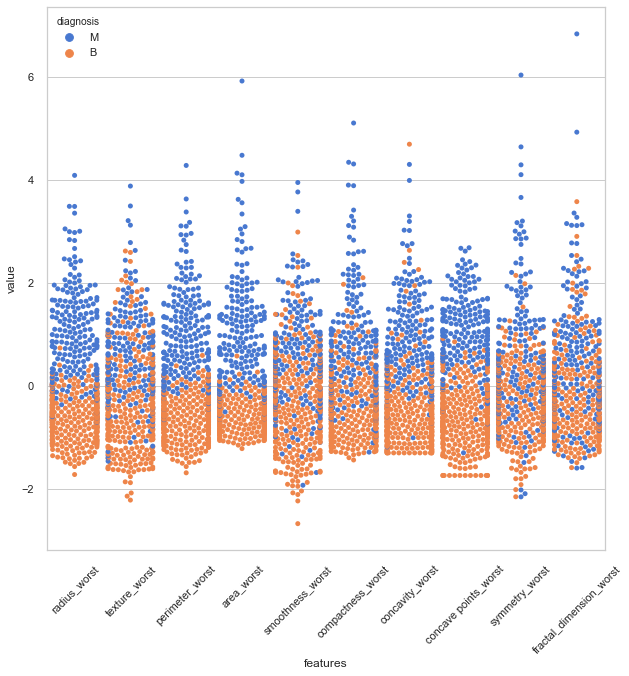

In [76]:
sns.set(style='whitegrid',palette='muted')
data = X
#normalization of the data
data_std=(data-data.mean())/data.std()
#data_std all rows but first 10 columns
data=pd.concat([y,data_std.iloc[:,20:30]],axis=1)
#Pivot: Turn rows into columns.
#Unpivot: Turn columns into rows.
data=pd.melt(data,id_vars='diagnosis',
             var_name='features',
             value_name='value'
            )
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45);

### Task 8: Observing all Pair-wise Correlations
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

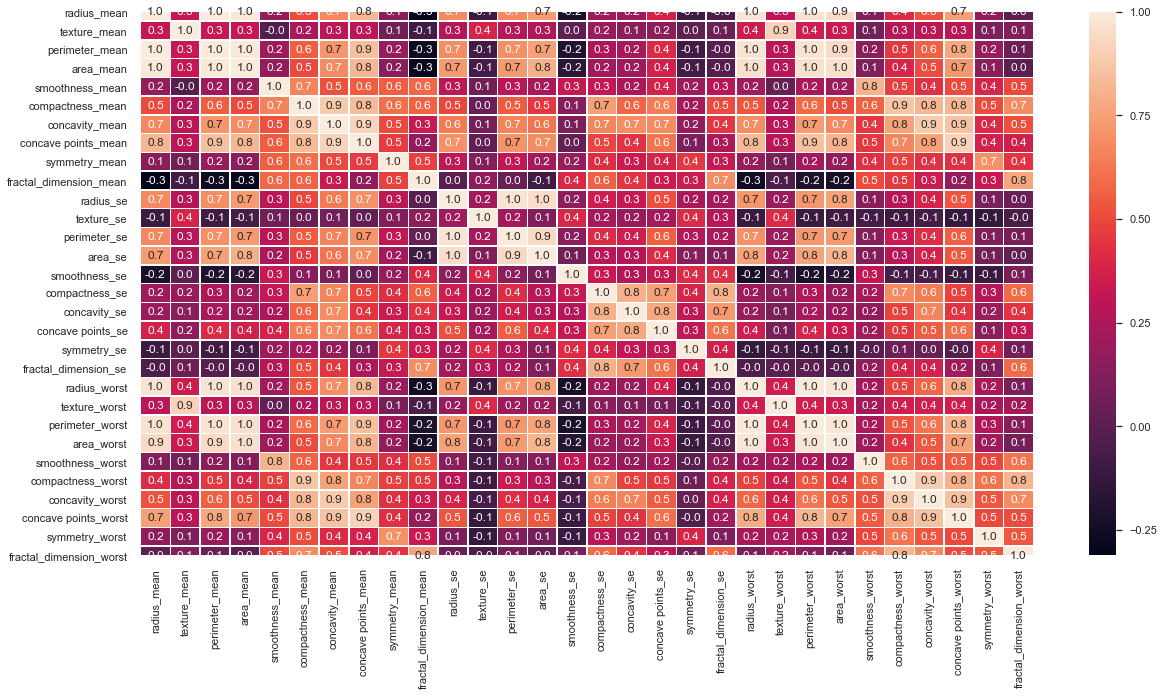

In [79]:
f, ax=plt.subplots(figsize=(20,10))
sns.heatmap(X.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax);